In [34]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image



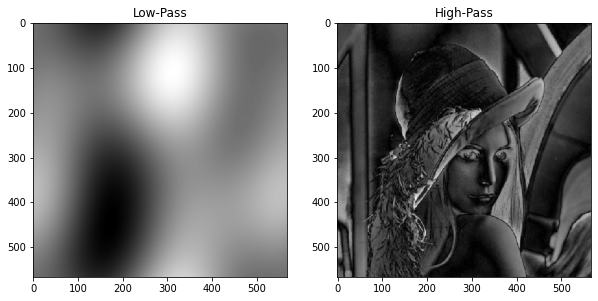

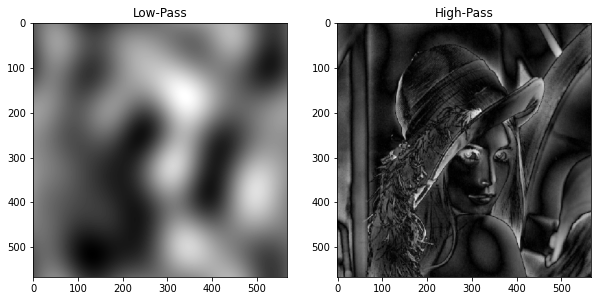

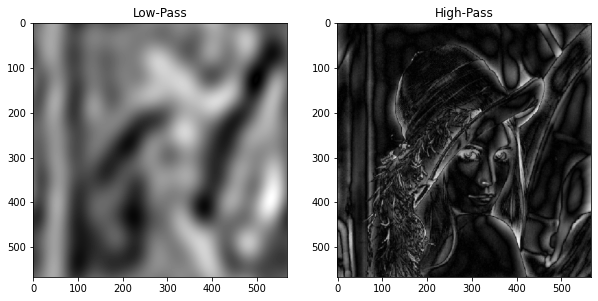

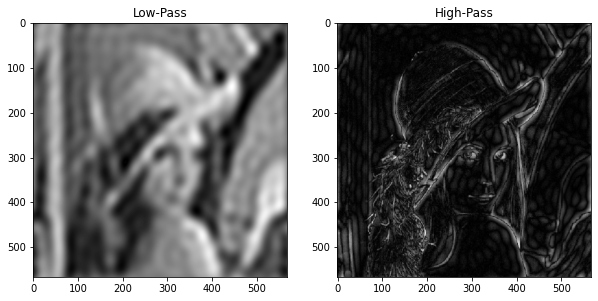

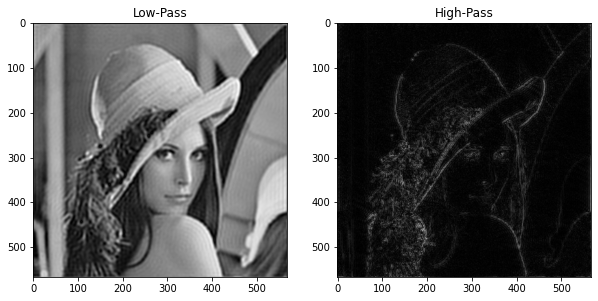

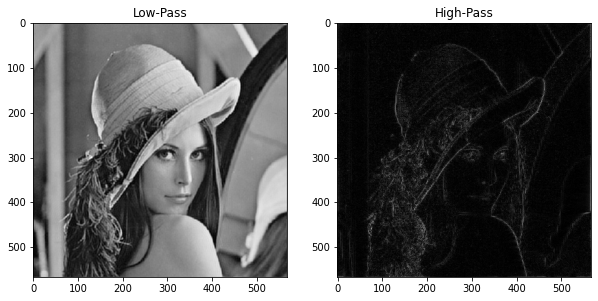

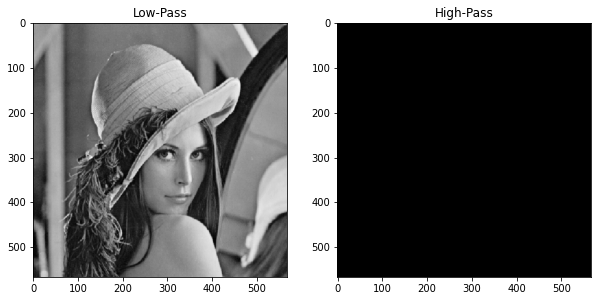

In [35]:
def filters(image, value):
    img = np.asarray(image.convert('L'))
    width, height = img.shape

    #forward transform
    dft = np.fft.fft2(img) 
    shifted = np.fft.fftshift(dft)

    #Low pass filter
    low = np.zeros((width, height))

    #High pass filter
    


    cv2.circle(low, (width // 2, height // 2), value, (255, 255, 255), -1)
    high = 255 - low
    

    # high_pass = np.multiply(high, shifted) / 255
    # low_pass = np.multiply(low, shifted) / 255

    # high_pass = np.fft.ifftshift(high_pass)
    # low_pass = np.fft.ifftshift(low_pass)

    # #Inverse transform
    # high_pass = np.fft.ifft2(high_pass) 
    # low_pass = np.fft.ifft2(low_pass) 

    # #Converting to int to show as image
    # high_pass = np.abs(high_pass).clip(0, 255).astype(np.uint8)
    # low_pass = np.abs(low_pass).clip(0, 255).astype(np.uint8)
    
    low_pass = np.multiply(low, shifted) / 255
    low_pass = np.fft.ifftshift(low_pass)
    low_pass = np.fft.ifft2(low_pass) # inverse transform
    low_pass = np.abs(low_pass).clip(0, 255).astype(np.uint8)
    
    high_pass = np.multiply(high, shifted) / 255
    high_pass = np.fft.ifftshift(high_pass)
    high_pass = np.fft.ifft2(high_pass) # inverse transform
    high_pass = np.abs(high_pass).clip(0, 255).astype(np.uint8)

    fig, (lp, hp) = plt.subplots(1, 2, figsize=(10, 10))
    
    lp.imshow(low_pass, cmap='gray')
    lp.set_title('Low-Pass')
    
    
    hp.imshow(high_pass, cmap='gray')
    hp.set_title('High-Pass')
    

#Cutoffs
for value in [2, 4, 8, 16,64, 128, 512]: 
    filters(Image.open('lena.png'),value)
